In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [4]:
df.head(5)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df['d_temp']=df.temperature-df.apparenttemperature

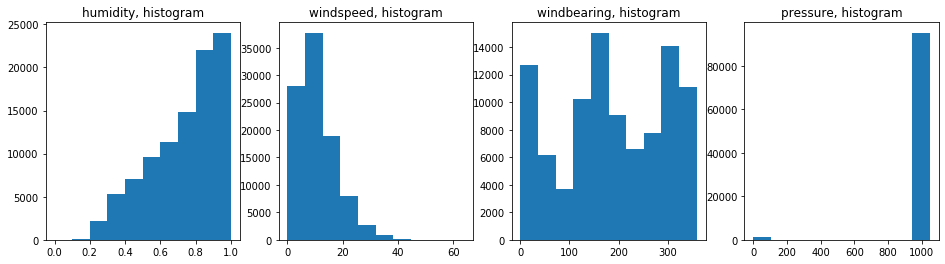

In [6]:
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.hist(df.humidity)
plt.title('humidity, histogram')

plt.subplot(1,4,2)
plt.hist(df.windspeed)
plt.title('windspeed, histogram')

plt.subplot(1,4,3)
plt.hist(df.windbearing)
plt.title('windbearing, histogram')

plt.subplot(1,4,4)
plt.hist(df.pressure)
plt.title('pressure, histogram')


plt.show()

In [7]:
df.windspeed[df.windspeed > 50]

12179    53.2427
12180    53.1944
12181    63.8526
12182    53.5969
12183    52.9368
20915    50.9726
20928    55.9314
20929    53.1944
63542    50.1354
75398    54.8849
75439    51.1497
Name: windspeed, dtype: float64

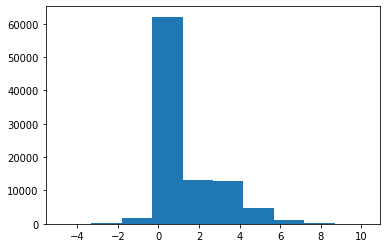

In [8]:
plt.hist(df.d_temp)
plt.show()

In [9]:
df.pressure[df.pressure < 800].count()

1288

There are zero pressures and we are going to drop them.

In [10]:
df=df.drop(df[df.pressure <800].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95165 entries, 0 to 96452
Data columns (total 13 columns):
date                   95165 non-null datetime64[ns, UTC]
summary                95165 non-null object
preciptype             95165 non-null object
temperature            95165 non-null float64
apparenttemperature    95165 non-null float64
humidity               95165 non-null float64
windspeed              95165 non-null float64
windbearing            95165 non-null float64
visibility             95165 non-null float64
loudcover              95165 non-null float64
pressure               95165 non-null float64
dailysummary           95165 non-null object
d_temp                 95165 non-null float64
dtypes: datetime64[ns, UTC](1), float64(9), object(3)
memory usage: 10.2+ MB


In [11]:
Y=df.temperature
X=df[['humidity', 'windspeed']]

import statsmodels.api as sm
     
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                 3.427e+04
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:46:31   Log-Likelihood:            -3.2393e+05
No. Observations:               95165   AIC:                         6.479e+05
Df Residuals:                   95162   BIC:                         6.479e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8362      0.109    348.088      0.0

The model is:
temperature_difference = 37.84 -32.4 * humidity- 0.19 *windspeed

The estimated coefficients are significant (p<0.05).  

The negative signs on the coefficients indicates that when humidity and windspeed increase, the temperature differences decrease.  This is contradictory to our understanding that windspeed increase will lead to windchill effect. 

In [12]:
df['humidity_windspeed']=df.humidity * df.windspeed
X=df[['humidity', 'windspeed', 'humidity_windspeed']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                 2.288e+04
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:46:31   Log-Likelihood:            -3.2390e+05
No. Observations:               95165   AIC:                         6.478e+05
Df Residuals:                   95161   BIC:                         6.478e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 38.9418      0

The model is: temperature_difference = 38.94 -33.91 * humidity- 0.29 * windspeed + 0.14 * humidity * windspeed

The humidity or windspeed alone will decrease the temperature difference.  However, the interaction between windspeed and humidity is significant, indicating that when humidity and windspeed both increase, the temperature and apparent temperature are getting close.  